In [539]:
%matplotlib inline

In [540]:
import warnings
warnings.filterwarnings("ignore")

In [541]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [542]:
# Import Dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df.head(10) # Check the first 10 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Seems like all attributes have numerical elements.

In [543]:
df.info() # All attributes are numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All Dtype are in int64 and Float64

In [545]:
df.shape # To check the shape of the data (Rows, Columns)

(5000, 14)

In [546]:
df.describe().T # 5-number Summary 

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


According to data, Personal Loan column is our target column.

In the dataset, columns ID and Zip Code are not important so we are dropping it.

Most of the people are around the age of 45 years and it is balanced data.

In Experience column, most people have around 20 years of experience, one thing is noticeable that min experience could be either 0 or more than 0, but can't be in minus.

Family column, generally there are 2 members in the family.

In CCAvg column, there is slight chances that it is left-skewed.

Education column, the data are balanced.

Mortgage column, from 75% to Max people took the mortgage.

Personal Loan, Securities Account, and CD Account are categorical data.

In Online column, only 50% of people use internet banking facilities.

Only 25% of people use a credit card issued by universal-bank in the CreditCard column.

In [547]:
# Check whether data have null value or not
print(df.isnull().any())
print()
print(df.isna().any())

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool


In [548]:
# Check whether the input elements are real numbers or not.
df[~df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


From the above result, we can say that all elements are real numbers.

In [549]:
# Droping the Id an Zip code columns as they are not important in dataset
df1 = df.drop(labels = ['ID', 'ZIP Code'], axis = 1)

In [550]:
# In experience column, we have to replace the negative values to positive values.
(df1['Experience'] < 0).value_counts()
df1.loc[df1['Experience'] < 0, 'Experience'] = 0
df1['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

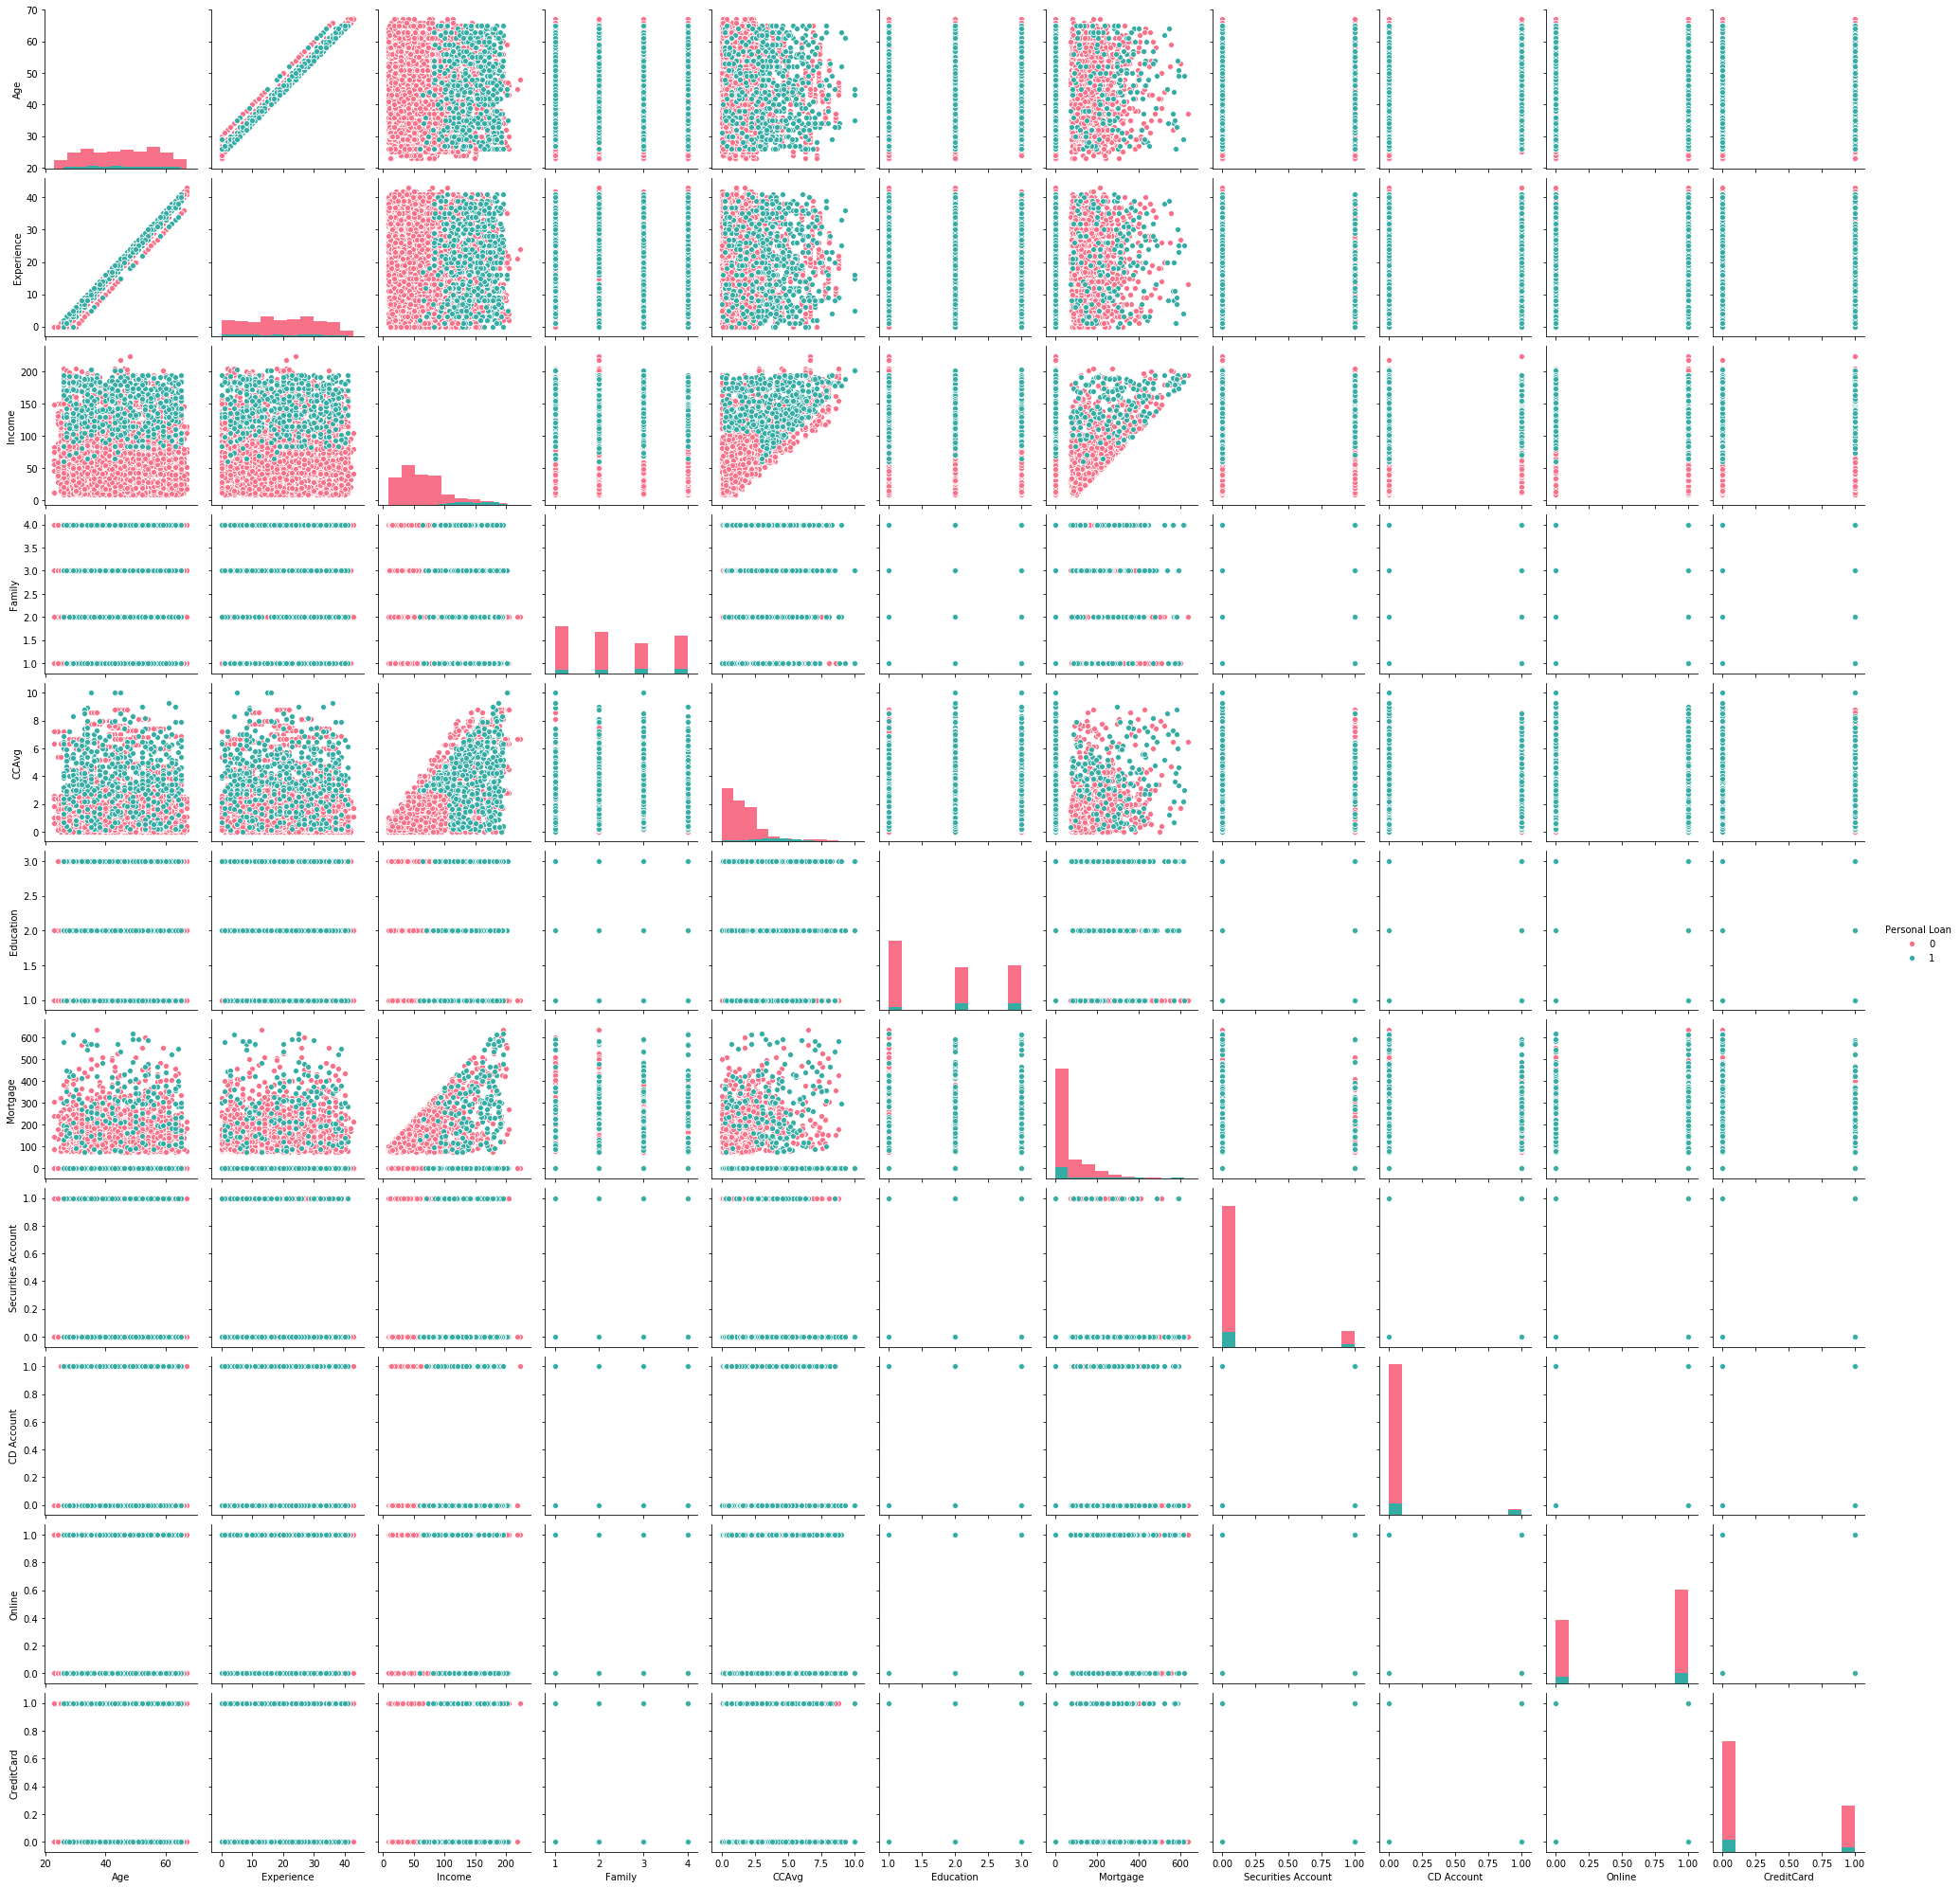

In [551]:
# Pairplot of dataframe
sns.pairplot(df1, diag_kind = 'hist', hue = "Personal Loan", palette = 'husl')

Only age and experience has a strong linear relationship.

Even in Income vs Age column, the customer who has a higher income also got a personal loan and age was not matter.

So far out target column is 'Personal Loan'. We have to find the customers are eligible for a personal loan or not. Hence we have to find correlated attributes with the target column to find out the eligibility.

In [552]:
# Check the correlation of targer column with all other attributes.
df1.corrwith(df1['Personal Loan'])

Age                  -0.007726
Experience           -0.007858
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
dtype: float64

From above correlation, seems like person who has higher Income, avg. spending on credit card per month and CD Account likely to get Personal Loan.

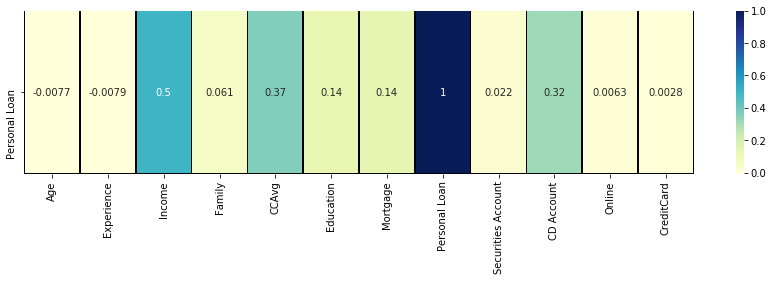

In [553]:
# Heatmap of only Personal Loan column
fig, ax = plt.subplots(figsize = (15,3)) 
sns.heatmap(df1.corr().loc[['Personal Loan'],:], annot = True, ax = ax, linewidths = 0.5, cmap="YlGnBu", linecolor='black')

Besides Income, CCAvg, and CD Account, Optional attributes like Education and Mortgage are less likely to impact on Personal Loan.

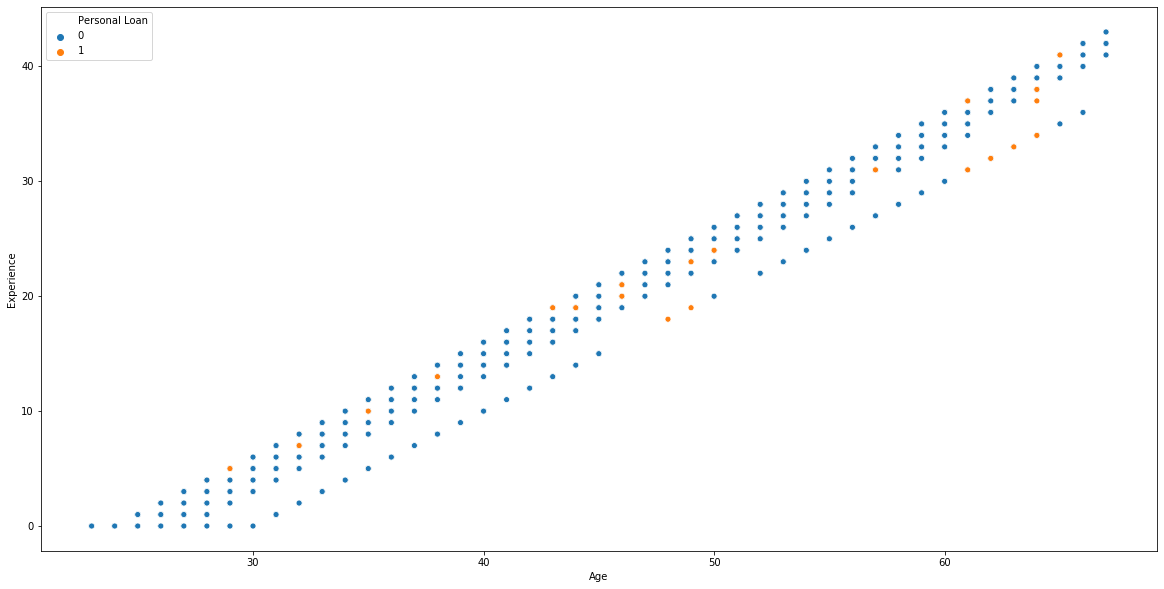

In [554]:
# Scatterplot
fig, ax = plt.subplots(figsize = (20,10)) 
sns.scatterplot(data = df1, x = 'Age', y = 'Experience', hue = 'Personal Loan')

Not a strong impact on personal loan but people who are above age 60 and have around 30 or more years of experience are likely to got a personal loan.

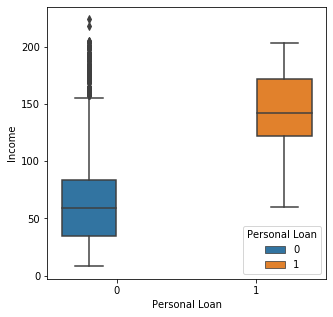

In [555]:
# Box Plot
fig, ax = plt.subplots(figsize = (5,5)) 
sns.boxplot(data = df1, x = 'Personal Loan', y = 'Income', hue = 'Personal Loan')

People who have income more than 100 got a personal loan.

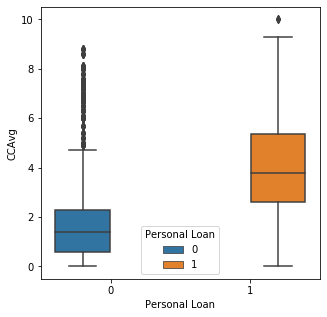

In [556]:
# Box Plot
fig, ax = plt.subplots(figsize = (5,5)) 
sns.boxplot(data = df1, x = 'Personal Loan', y = 'CCAvg', hue = 'Personal Loan')

People who have avg. spending on credit cards per month more than 2 got a personal loan.

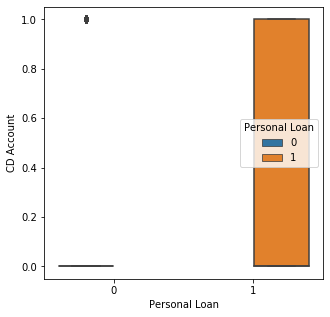

In [557]:
# Box Plot
fig, ax = plt.subplots(figsize = (5,5)) 
sns.boxplot(data = df1, x = 'Personal Loan', y = 'CD Account', hue = 'Personal Loan')

A customer who has a certificate of deposit account with the bank likely got a personal loan.

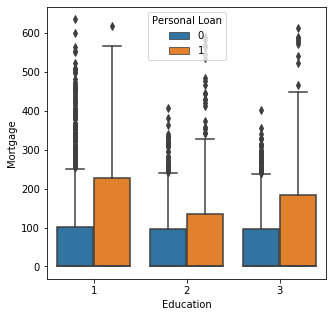

In [558]:
fig, ax = plt.subplots(figsize = (5,5)) 
sns.boxplot(data = df1, x = 'Education', y = 'Mortgage', hue = 'Personal Loan')

less impacted attributes - Mortage and Education, customers who have a mortgage more than 100 got a personal loan, and customers who had education around 1 got the personal loan.

In [559]:
# Independant variable and target variable
X = df1.drop(labels = 'Personal Loan', axis = 1)
y = df1['Personal Loan']

In [560]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

# Logistic Regression

In [561]:
from sklearn.metrics import classification_report

In [562]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [563]:
lr_report = classification_report(y_test, y_predict)

In [564]:
from sklearn import metrics
print("Training score:-", regressor.score(X_train, y_train))
print("Testing Score:-", regressor.score(X_test, y_test))

Training score:- 0.9468571428571428
Testing Score:- 0.944


In [565]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [566]:
print("Training score:-", regressor.score(scaledX_train, y_train))
print("Testing Score:-", regressor.score(scaledX_test, y_test))

Training score:- 0.5654285714285714
Testing Score:- 0.57


In [567]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.944

With stadard scale, it give very low prediction so better if we use normal data rather then std. scaled one.

In [568]:
LR = metrics.confusion_matrix(y_test, y_predict)

# K-NN

In [569]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(3,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 7


In [570]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)

In [571]:
knn_report = classification_report(y_test, y_predict)

In [572]:
print("Training score:-", KNN.score(X_train, y_train))
print("Testing Score:-", KNN.score(X_test, y_test))

Training score:- 1.0
Testing Score:- 0.912


In [573]:
sc = StandardScaler()

sc.fit(X_train)

scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)


In [574]:
print("Training score:-", KNN.score(scaledX_train, y_train))
print("Testing Score:-", KNN.score(scaledX_test, y_test))

Training score:- 0.906
Testing Score:- 0.8993333333333333


In [575]:
accuracy_score(y_test, y_predict)

0.912

Here, it is overfit model so applying std. scaler improved the prediction.

In [576]:
Knn = metrics.confusion_matrix(y_test, y_predict)

# Naive Bayes

In [577]:
from sklearn.naive_bayes import GaussianNB

In [578]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [579]:
NB_report = classification_report(y_test, y_predict)

In [580]:
print("Training score:-", model.score(X_train, y_train))
print("Testing Score:-", model.score(X_test, y_test))

Training score:- 0.8831428571428571
Testing Score:- 0.884


In [581]:
sc = StandardScaler()

sc.fit(X_train)

scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [582]:
print("Training score:-", model.score(scaledX_train, y_train))
print("Testing Score:-", model.score(scaledX_test, y_test))

Training score:- 0.9011428571428571
Testing Score:- 0.896


In [583]:
accuracy_score(y_test, y_predict)

0.884

With std. scaled data, the prediction is improved.

In [584]:
NB = metrics.confusion_matrix(y_test, y_predict)

# Confusion Matrix

### For Logistic Regression

In [585]:
LR # Confusion Matrix for Logistic Regression

array([[1326,   23],
       [  61,   90]], dtype=int64)

In [586]:
print(lr_report) # Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1349
           1       0.80      0.60      0.68       151

    accuracy                           0.94      1500
   macro avg       0.88      0.79      0.83      1500
weighted avg       0.94      0.94      0.94      1500



## For K-NN

In [587]:
Knn # Confusion Matrix for K-NN

array([[1316,   33],
       [  99,   52]], dtype=int64)

In [588]:
print(knn_report) # Classification Report for K-NN

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1349
           1       0.61      0.34      0.44       151

    accuracy                           0.91      1500
   macro avg       0.77      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



## For Naive Bayes

In [589]:
NB # Confusion Matrix for Naive Bayes

array([[1233,  116],
       [  58,   93]], dtype=int64)

In [590]:
print(NB_report) # Classification Report for Naive Bayes

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1349
           1       0.44      0.62      0.52       151

    accuracy                           0.88      1500
   macro avg       0.70      0.76      0.73      1500
weighted avg       0.90      0.88      0.89      1500



# Conclusion

From the above results, the best performing model is Logistic Regression because it has good accuracy score and precision as well as recall, it is also give better than the other two models and in the dataset, most of the attributes are above the threshold and below the threshold so for this, Logistic Regression perform better. KNN is good but the prediction is less acceptable. And so far Naive Bayes, accuracy is low compared to Logistic Regression and KNN. Lastly, standard scaled data of KNN and Naive Bayes can't reach the Logistic Regression so far. Hence for this dataset Logistic Regression > KNN > Naive Bayes.